# Logistic regression
Perform logistic regression on scalar univariate data (i.e. depenent and independent variables are one-dimensional) using `scikit-learn`.  Monitor the accuracy rate as a function of the threshold value (conventionally taken to be `50%`).


# References
Statistical tools:
- [logistic function](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html) with a simple example of one-dimensional logistic regression (scikit-learn)
- [logistic regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (scikit-learn)
- [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) (scikit-learn)
- [expit: logistic sigmoid function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html#scipy.special.expit) (scikit-learn)
- [adjusting threshold in logistic regressor](https://stackoverflow.com/a/52253597/9472676) (J. Doe on stackoverflow)

Dataset generation:
- [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) (scikit-learn)
- [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) (scikit-learn)
- [generating synthetic classification data using scikit-learn](https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922) (Faizan Ahemad)
- [How to generate test datasets in Python using scikit-learn](https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/) (Jason Brownlee)

Visualization:
- [matplotlib axes plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html)

---
tags: statistics, logistic regression, visualization, theory

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit, logit
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# Constants

In [2]:
COLOR_SAMPLES = 'tab:blue'
COLOR_PREDS = 'tab:orange'
COLOR_MODEL = 'tab:red'

# Generate data

In [3]:
n_samples = 100
x_min, x_max = -5, 5
X = np.random.normal(size=n_samples)
y = (X>0).astype(np.float)

X[X>0] *= 2
X += .3*np.random.normal(size=n_samples)
X = X[:,None]

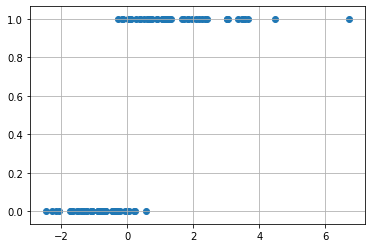

In [4]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.grid();

# Fit classifier

In [5]:
clf = LogisticRegression(solver='lbfgs');
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
def clf_predict(X, clf=clf, thresh=.5):
    """Prediction of a logistic regressor with adjustable threshold."""
    preds = np.where(clf.predict_proba(X)[:,1] > thresh, 1, 0)
    return preds

def clf_predict_1d(X, clf=clf, thresh=.5):
    """Prediction of a one-dimensional logistic regression with adjustable threshold."""
    val = (logit(thresh)-clf.intercept_)/clf.coef_[0]
    preds = np.where(X>val, 1, 0)
    return preds

# Make predictions

In [7]:
line_X = np.linspace(X.min(), X.max(), 100)
scores = line_X * clf.coef_ + clf.intercept_
loss = expit(scores).ravel()

thresh = 0.5
val = (logit(thresh)-clf.intercept_)/clf.coef_[0]
# preds = clf.predict(X)
# preds = clf_predict(X, thresh=thresh)
preds = clf_predict_1d(X, thresh=thresh)

# Metrics

In [8]:
# acc_score = (y == preds.ravel()).mean()
accuracy_score(y, preds)

0.92

# Visualization

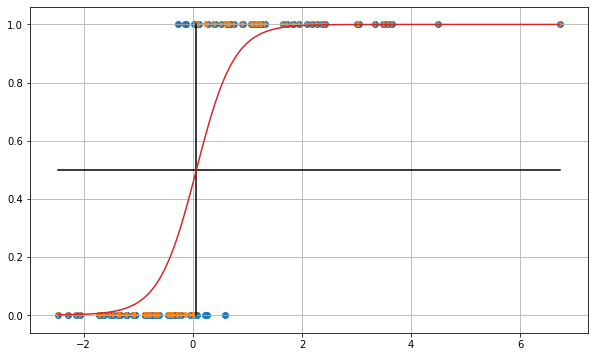

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y, marker='o', color=COLOR_SAMPLES)
ax.scatter(X, preds, marker='+', color=COLOR_PREDS)
ax.plot([val, val], [0, 1], color='k')
ax.plot([X.min(), X.max()], [thresh, thresh], color='k')
ax.plot(line_X, loss, color=COLOR_MODEL)

ax.grid();

In [10]:
acc_scores = []
thresh_range = np.arange(0.001,1,0.001)
for thresh in thresh_range:
    val = (logit(thresh)-clf.intercept_)/clf.coef_[0]
    preds = clf_predict_1d(X, thresh=thresh)
    acc_score = accuracy_score(y, preds)
    acc_scores.append(acc_score)

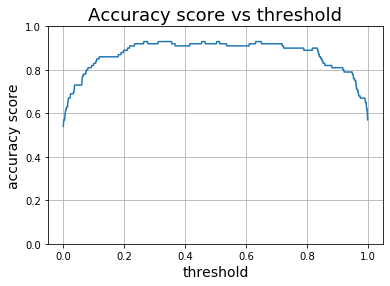

In [11]:
fig, ax = plt.subplots()
ax.plot(thresh_range, acc_scores);
ax.set_title("Accuracy score vs threshold", fontsize=18)
ax.set_xlabel("threshold", fontsize=14)
ax.set_ylabel("accuracy score", fontsize=14)
ax.set_ylim([0,1])
ax.grid()